In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
rec_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
rec_date

('2017-08-23',)

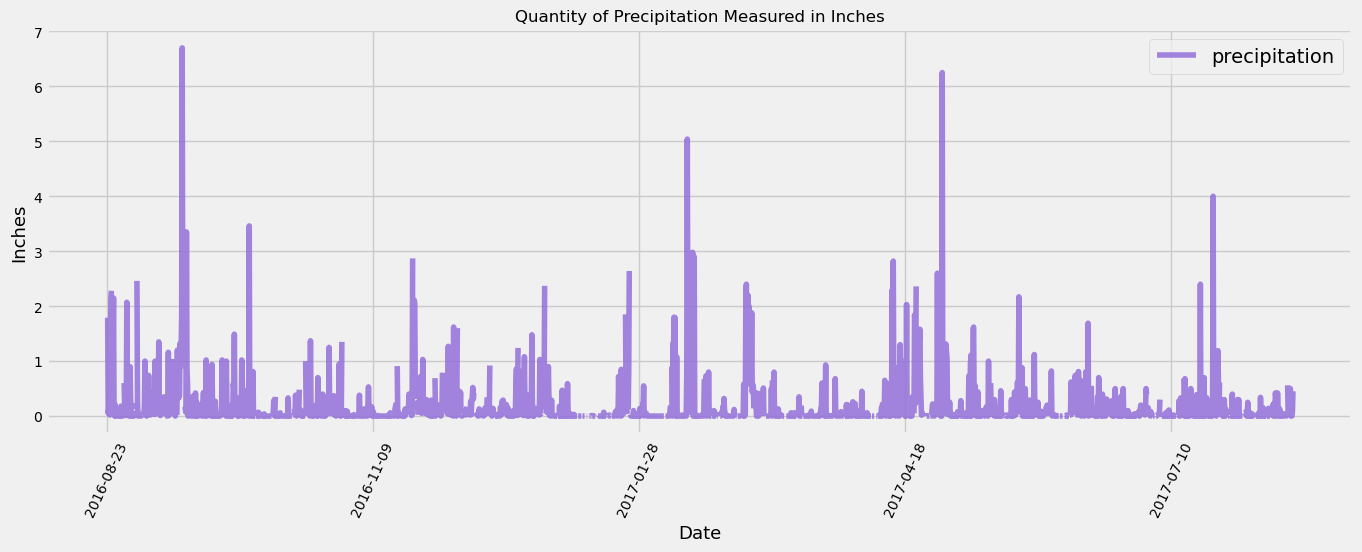

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
last12months = (dt.datetime.strptime(rec_date[0], '%Y-%m-%d') - dt.timedelta(days=365)).strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= last12months).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip_data, columns = ['date', 'precipitation'])
precip_df.set_index('date', inplace=True)
# Sort the dataframe by date
precip_df = precip_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
prcp_chart = precip_df.plot(color="mediumpurple", figsize=(15,5), fontsize = 10, alpha = .85)

plt.title("Quantity of Precipitation Measured in Inches", fontsize = 12)
plt.xlabel('Date', fontsize = 13)
plt.xticks(rotation=65, fontsize = 10)
plt.ylabel('Inches', fontsize = 13)
plt.show()

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station.id).count()

total_stations

9

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.tobs)).filter(measurement.station == station.station).group_by(measurement.station).order_by(func.count(measurement.tobs).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

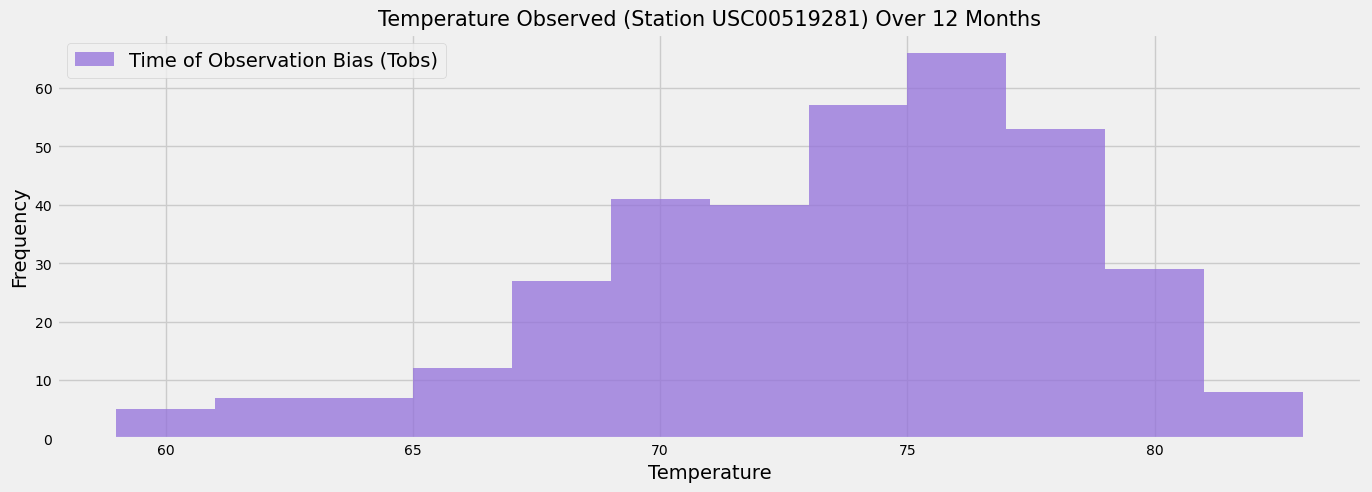

In [29]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_data = session.query(measurement.date, measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date >= last12months).all()
active_df = pd.DataFrame(active_data)

active_hist = active_df.plot(kind='hist', bins=12, color="mediumpurple", figsize=(15,5), fontsize = 10, alpha = .75)
plt.title('Temperature Observed (Station USC00519281) Over 12 Months', fontsize = 15)
plt.xlabel('Temperature', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
active_hist.legend(['Time of Observation Bias (Tobs)'])
plt.show()

# Close Session

In [30]:
# Close Session
session.close()
